In [1]:
import requests
import timeit

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Ellipse
from scipy.signal import chirp, find_peaks, peak_widths

In [8]:
request_url = "http://black:8080/generate"
parameters = { 
    "particle_count": 10000, 
    "dist_z": "gauss",
    "sig_Ekin": 1.5,
    "Nemit_x": 1.0E0,
    "sig_y": 0.75E0,
    "Nemit_y": 1.0E0,
    "C_sig_z": 2.0,
    "sig_z": 1.0E0,
    "sig_x":0.75E0,
    "Ref_Ekin":2.0E0
}

In [9]:
r = requests.post(request_url, json=parameters)

In [10]:
r.status_code

200

In [6]:
raw_data = r.json()
raw_data.keys()

dict_keys(['timestamp', 'particles'])

In [7]:
data = pd.DataFrame(raw_data['particles'])
data

,x,y,z,px,py,pz,clock,macro_charge,particle_index,status_flag
0,0.000000,0.000000,0.0,0.000,0.00,2458500.00,0.000000,-0.0001,1,-1
1,0.000375,0.000000,0.0,0.000,0.00,0.00,0.000500,-0.0001,1,-3
2,0.000000,0.000375,0.0,0.000,0.00,0.00,-0.000500,-0.0001,1,-3
3,0.000750,0.000000,0.0,0.000,0.00,0.00,0.001000,-0.0001,1,-3
4,0.000000,0.000750,0.0,0.000,0.00,0.00,-0.001000,-0.0001,1,-3
...,...,...,...,...,...,...,...,...,...,...
9995,-0.000230,0.000200,0.0,720.630,790.30,-502.49,-0.001832,-0.0001,1,-1
9996,-0.000349,0.000053,0.0,489.310,425.47,474.05,0.002151,-0.0001,1,-1
9997,-0.000478,-0.000092,0.0,304.350,156.16,-1788.60,0.000387,-0.0001,1,-1
9998,-0.000622,-0.000241,0.0,139.760,-89.95,2307.90,-0.000476,-0.0001,1,-1


In [126]:
x = data.loc[:, 'x'].values
px = data.loc[:, 'px'].values

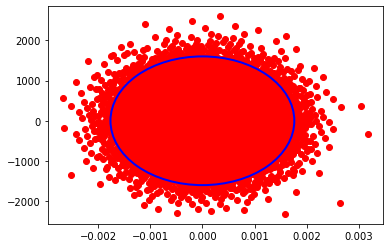

In [129]:
plt.figure()
ax = plt.gca()

ax.plot(x,px, "ro")
ellipse = Ellipse((0.0,0.0), 2*2.35*np.std(x), 2*2.35*np.std(px), edgecolor='blue', fc='None', lw=2,zorder=3)
                        
ax.add_patch(ellipse)
plt.show()